# Data Prep

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Importing Dependencies

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Reading the 'dataset_final.csv' file and storing the data in a data frame variable 'df'  
df = pd.read_csv('dataset_final.csv')  

### Viewing Dataset

In [4]:
# Checking values in dataset
df.head()

,Unnamed: 0,LOCATION,TIME,A0101,A0102,A0103,A0104,A0105,A0106,A0107,A0108,A0109,A0110,A0111,A0112,Value
0,19,Austria,1997,4108.906094,1371.341750,2728.457071,8056.509275,2796.687374,5112.427472,4742.453818,758.874407,4209.634418,3456.316018,4050.692980,5139.136800,105.0
1,20,Austria,1998,4134.874040,1453.494591,2756.667422,8293.207795,2806.232078,5477.970662,4853.885138,817.797209,4434.233937,3589.570129,4386.441689,5418.631930,106.0
2,21,Austria,1999,3512.134262,1309.272732,2345.518001,7587.366398,2488.730213,4901.367888,4352.972547,767.458724,3957.853337,2987.631369,3940.088034,4711.042975,101.0
3,22,Austria,2000,3668.050761,1348.232551,2392.914897,7949.323076,2632.448811,5102.293726,4649.665077,1081.369088,4194.190239,3102.788189,4180.520262,5065.905120,90.0
4,23,Austria,2001,3818.863899,1371.184839,2440.900536,8222.266815,2596.414954,5276.760465,4635.502159,1081.188711,4309.585478,3198.814951,4141.896514,5107.650291,93.0


In [6]:
# Checking shape of the dataset
df.shape

(610, 16)

### Dropping Unwanted column

In [5]:
# Dropping the 'Unnamed: 0' column from the data frame 'df'  
# 'axis=1' specifies that we want to drop a column and not a row  
df = df.drop(['Unnamed: 0'], axis=1)

### Mapping Location values to Integers

In [6]:
# Finding each country in dataset
set(df.LOCATION)

{'Austria',
 'Belgium',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Türkiye',
 'United Kingdom'}

In [7]:
# Mapping countries in dataset to integer values
mymap = {'Austria':1, 'Belgium':2, 'Denmark':3, 'Estonia':4, 'Finland':5, 'France':6, 'Germany':7, 'Greece':8, 'Hungary':9, 'Iceland':10, 'Ireland':11, 'Italy':12, 'Latvia':13, 'Lithuania':14, 'Luxembourg':15, 'Netherlands':16, 'Norway':17, 'Poland':18, 'Portugal':19, 'Slovenia':20, 'Spain':21, 'Sweden':22, 'Switzerland':23, 'Türkiye':24, 'United Kingdom':25}

In [8]:
# Appling map to df, making counties integer values
df = df.applymap(lambda k: mymap.get(k) if k in mymap else k)

In [9]:
# Checking that there are 25 countries in dataset
len(set(df.LOCATION))

25

In [10]:
# Displaying each country and their values
print(mymap)

{'Austria': 1, 'Belgium': 2, 'Denmark': 3, 'Estonia': 4, 'Finland': 5, 'France': 6, 'Germany': 7, 'Greece': 8, 'Hungary': 9, 'Iceland': 10, 'Ireland': 11, 'Italy': 12, 'Latvia': 13, 'Lithuania': 14, 'Luxembourg': 15, 'Netherlands': 16, 'Norway': 17, 'Poland': 18, 'Portugal': 19, 'Slovenia': 20, 'Spain': 21, 'Sweden': 22, 'Switzerland': 23, 'Türkiye': 24, 'United Kingdom': 25}


### Detecting Outliers

<AxesSubplot:xlabel='TIME', ylabel='A0102'>

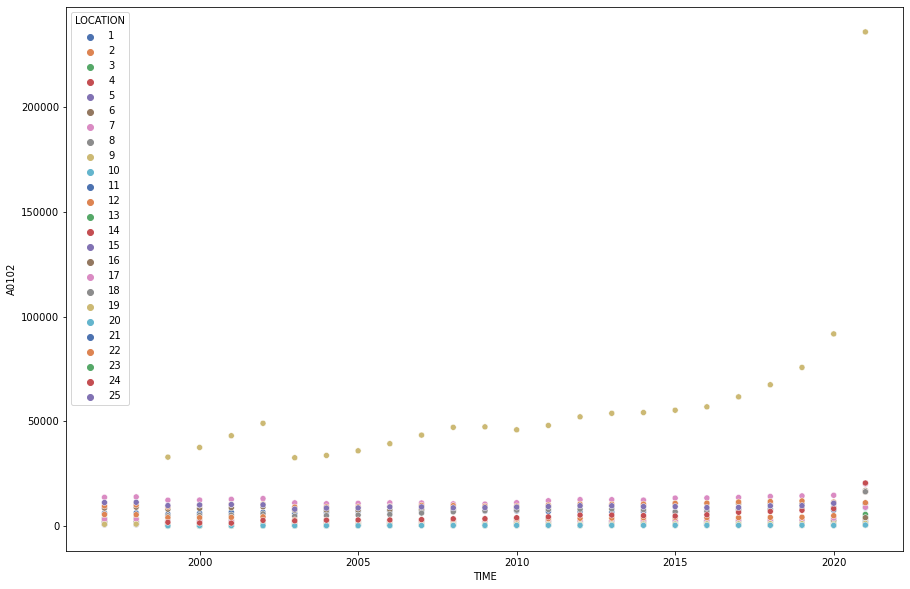

In [11]:
# Food Value over time 
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="TIME", y="A0102", hue="LOCATION", palette="deep")

<AxesSubplot:xlabel='TIME', ylabel='A0102'>

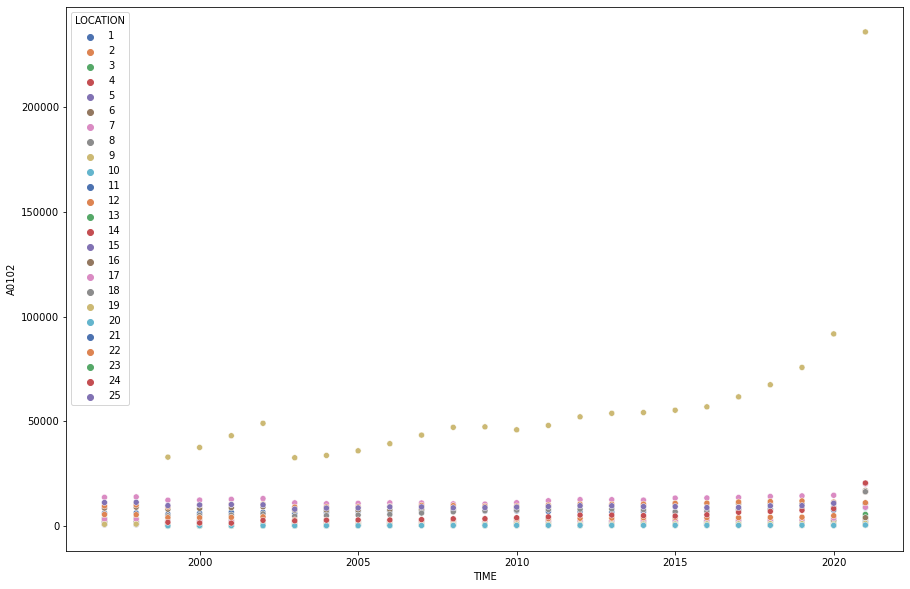

In [12]:
# Alcohol Value over time 
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="TIME", y="A0102", hue="LOCATION", palette="deep")

In [13]:
# Row 270 - shows Hungary 2021 is an outlier - Hungary in general is very expensive
df.iloc[265:275,:]

,LOCATION,TIME,A0101,A0102,A0103,A0104,A0105,A0106,A0107,A0108,A0109,A0110,A0111,A0112,Value
265,9,2016,138200.427625,56966.218375,28849.797958,152288.550375,36551.763292,104543.012958,101200.102708,30052.375875,71201.013458,79385.083708,67564.458875,104819.985667,54.0
266,9,2017,150086.804000,61724.514125,31543.291375,172972.450042,39857.105917,108550.984458,107143.453042,30520.104708,80575.978875,84216.244375,72087.714083,111557.798083,57.0
267,9,2018,160901.488833,67486.597292,34596.452708,189862.930917,45025.044750,114790.812833,119096.050250,28674.273417,87801.519792,89502.540583,81721.786125,117951.622000,59.0
268,9,2019,174502.956417,75721.251125,36286.096167,212963.025958,51579.135000,121567.822750,127807.030042,28647.348375,96118.828500,96007.432500,91598.538500,131391.419458,58.0
269,9,2020,213199.198048,91709.172952,35861.044857,261264.337238,62403.992619,158468.944905,129086.956333,34286.893524,98220.468524,103350.602476,72157.509667,161878.407000,57.0
270,9,2021,548967.812889,235567.474333,92154.153111,668950.970667,160406.541111,399839.145111,331984.744778,88191.572556,252281.954778,262894.190778,185152.048444,416551.389778,59.0
271,11,1997,1806.020564,946.552909,993.978505,2623.830089,1000.649361,1964.740573,1597.618876,253.449880,1148.596561,1671.830328,1875.613020,1695.819076,100.0
272,11,1998,1840.579176,1017.264753,1125.038985,2949.135207,1108.426991,2041.546785,1771.252526,263.484993,1236.784884,1644.865402,2188.291372,1978.391567,100.0
273,11,1999,1608.231384,952.519301,1000.642821,2859.466560,1112.197427,1889.787253,1747.362381,251.351293,1170.641295,1547.073695,2070.520805,2026.378529,100.0
274,11,2000,1824.433280,1057.987333,1201.796596,3262.964166,1242.579882,1989.895159,2194.023492,396.829709,1360.513954,1645.486070,2298.666023,2177.360764,94.0


In [14]:
# Dropping the row with index 270 from the data frame 'df'  
# 'axis=0' specifies that we want to drop a row and not a column  
df = df.drop(labels=270, axis=0)  

<AxesSubplot:xlabel='TIME', ylabel='A0103'>

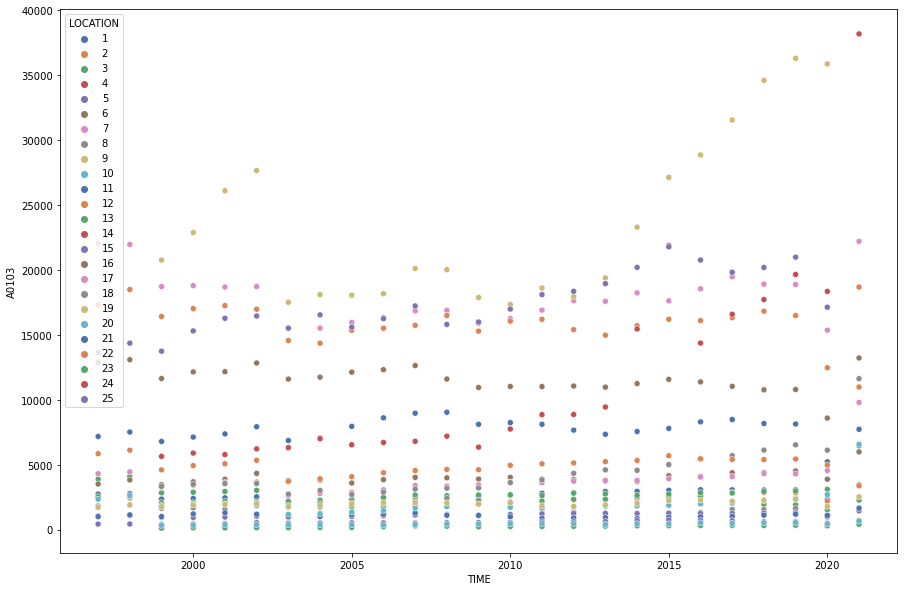

In [15]:
# Clothing Value over time 
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="TIME", y="A0103", hue="LOCATION", palette="deep")

### Creating X, y labels

In [16]:
# Creating our features label and target variable
X = df.iloc[:,0:14]
y = df.iloc[:,-1]

In [17]:
X.head()

,LOCATION,TIME,A0101,A0102,A0103,A0104,A0105,A0106,A0107,A0108,A0109,A0110,A0111,A0112
0,1,1997,4108.906094,1371.341750,2728.457071,8056.509275,2796.687374,5112.427472,4742.453818,758.874407,4209.634418,3456.316018,4050.692980,5139.136800
1,1,1998,4134.874040,1453.494591,2756.667422,8293.207795,2806.232078,5477.970662,4853.885138,817.797209,4434.233937,3589.570129,4386.441689,5418.631930
2,1,1999,3512.134262,1309.272732,2345.518001,7587.366398,2488.730213,4901.367888,4352.972547,767.458724,3957.853337,2987.631369,3940.088034,4711.042975
3,1,2000,3668.050761,1348.232551,2392.914897,7949.323076,2632.448811,5102.293726,4649.665077,1081.369088,4194.190239,3102.788189,4180.520262,5065.905120
4,1,2001,3818.863899,1371.184839,2440.900536,8222.266815,2596.414954,5276.760465,4635.502159,1081.188711,4309.585478,3198.814951,4141.896514,5107.650291


In [18]:
y.head()

0    105.0
1    106.0
2    101.0
3     90.0
4     93.0
Name: Value, dtype: float64

### Visualisations

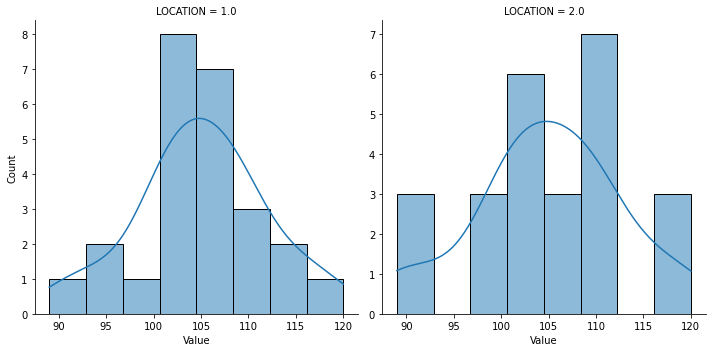

In [19]:
# Displot comparing two country's target value (Countries must be neighbouring in index)
sns.displot(
    data=df, x=y,
    # 0:50 is Austria vs Belgium
    col=df["LOCATION"][0:50],
    facet_kws=dict(sharey=False, sharex=False),
    kde=True)

<AxesSubplot:xlabel='TIME', ylabel='Value'>

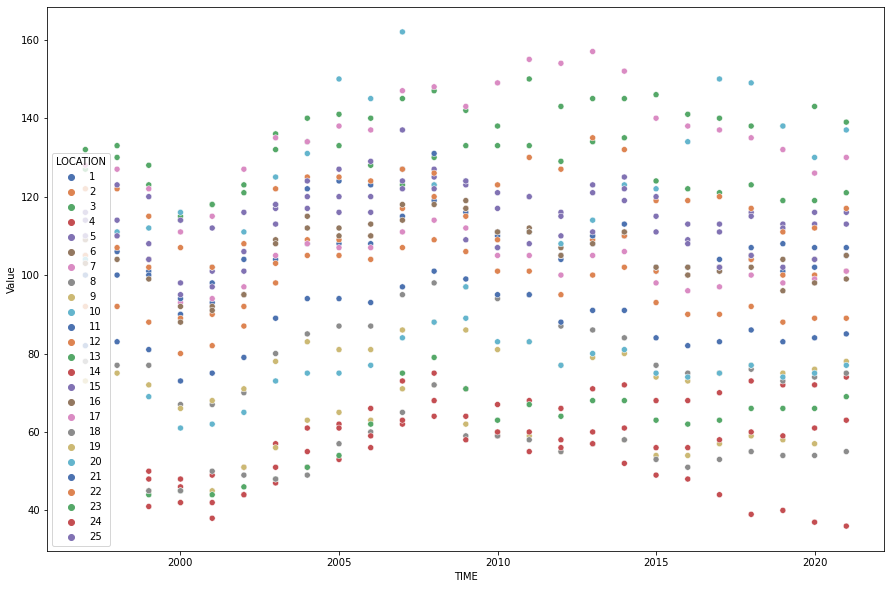

In [20]:
# Value over time 
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="TIME", y="Value", hue="LOCATION", palette="deep")

# Modeling

In [21]:
# libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
import tensorflow as tf  
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import SGD
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import StandardScaler  

### RandomForest - No Normalization

In [166]:
# Split the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  
  
# Create a RandomForestRegressor model and train it on the training data  
rfr = RandomForestRegressor()  
rfr.fit(X_train, y_train)  
  
# Make predictions on your training and test data  
y_train_pred = rfr.predict(X_train)  
y_test_pred = rfr.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

R2 Training score: 0.986
R2 Testing score: 0.906

MSE Training score: 10.665
MSE Testing score: 64.002


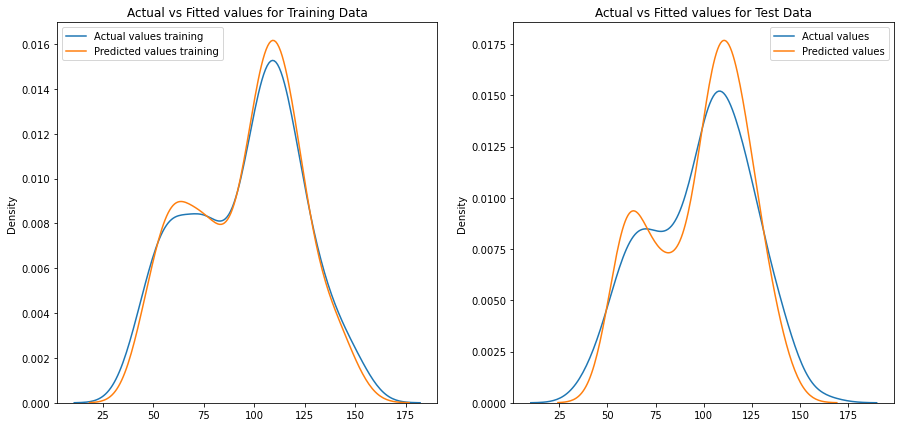

In [173]:
# Setting the size of the figure  
fig, axs = plt.subplots(ncols=2, figsize=(15, 7))  
  
# Plotting the distribution of the actual values in blue and the predicted values in orange for training data  
sns.distplot(y_train, hist=False, label="Actual values training", ax=axs[0])  
sns.distplot(y_train_pred, hist=False, label="Predicted values training", ax=axs[0])  
axs[0].legend()  
  
# Setting the title of the plot for training data  
axs[0].set_title("Actual vs Fitted values for Training Data")  
  
# Plotting the distribution of the actual values in blue and the predicted values in orange for test data  
sns.distplot(y_test, hist=False, label="Actual values", ax=axs[1])  
sns.distplot(y_test_pred, hist=False, label="Predicted values", ax=axs[1])  
axs[1].legend()  
  
# Setting the title of the plot for test data  
axs[1].set_title("Actual vs Fitted values for Test Data")  
  
# Displaying the plot
plt.show()

### RandomForest - Normalization

In [174]:
# Creating our features label and target variable
X = df.iloc[:,0:14]
y = df.iloc[:,-1]
y = y.values.reshape(-1,1)

PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X_transform=PredictorScalerFit.transform(X)
y_transform=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 14)
(426, 1)
(183, 14)
(183, 1)


In [175]:
# Create a RandomForestRegressor model and train it on the training data  
rfr = RandomForestRegressor()  
rfr.fit(X_train, y_train)  
  
# Make predictions on your training and test data  
y_train_pred = rfr.predict(X_train)  
y_test_pred = rfr.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

R2 Training score: 0.984
R2 Testing score: 0.905

MSE Training score: 0.016
MSE Testing score: 0.086


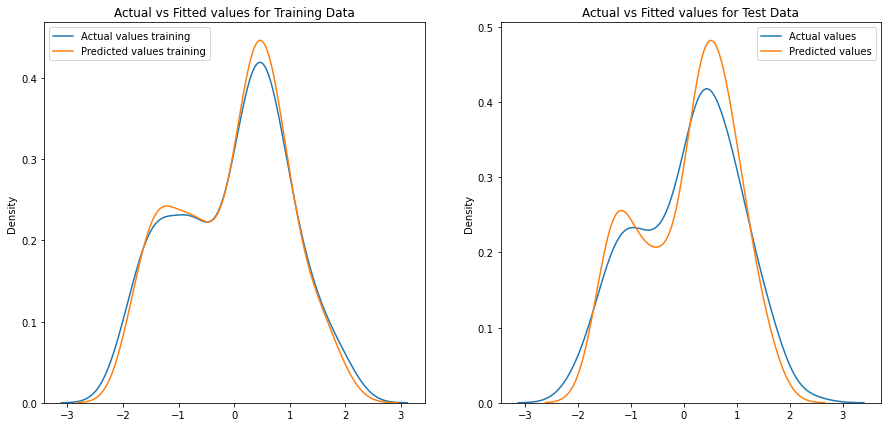

In [176]:
# Setting the size of the figure  
fig, axs = plt.subplots(ncols=2, figsize=(15, 7))  
  
# Plotting the distribution of the actual values in blue and the predicted values in orange for training data  
sns.distplot(y_train, hist=False, label="Actual values training", ax=axs[0])  
sns.distplot(y_train_pred, hist=False, label="Predicted values training", ax=axs[0])  
axs[0].legend()  
  
# Setting the title of the plot for training data  
axs[0].set_title("Actual vs Fitted values for Training Data")  
  
# Plotting the distribution of the actual values in blue and the predicted values in orange for test data  
sns.distplot(y_test, hist=False, label="Actual values", ax=axs[1])  
sns.distplot(y_test_pred, hist=False, label="Predicted values", ax=axs[1])  
axs[1].legend()  
  
# Setting the title of the plot for test data  
axs[1].set_title("Actual vs Fitted values for Test Data")  
  
# Displaying the plot
plt.show()

### RandomForest - Normalization GridSearchCV

In [188]:
# Creating our features label and target variable
X = df.iloc[:,0:14]
y = df.iloc[:,-1]
y = y.values.reshape(-1,1)

PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X_transform=PredictorScalerFit.transform(X)
y_transform=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 14)
(426, 1)
(183, 14)
(183, 1)


In [189]:
# Define the parameter grid to search over
parameters = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [190]:
# Create a RandomForestRegressor model
rfr = RandomForestRegressor()

# Create a GridSearchCV object and fit it to the data
model = GridSearchCV(rfr, parameters)
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]})

In [191]:
# Make predictions on your training and test data  
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

R2 Training score: 0.986
R2 Testing score: 0.907

MSE Training score: 0.015
MSE Testing score: 0.084


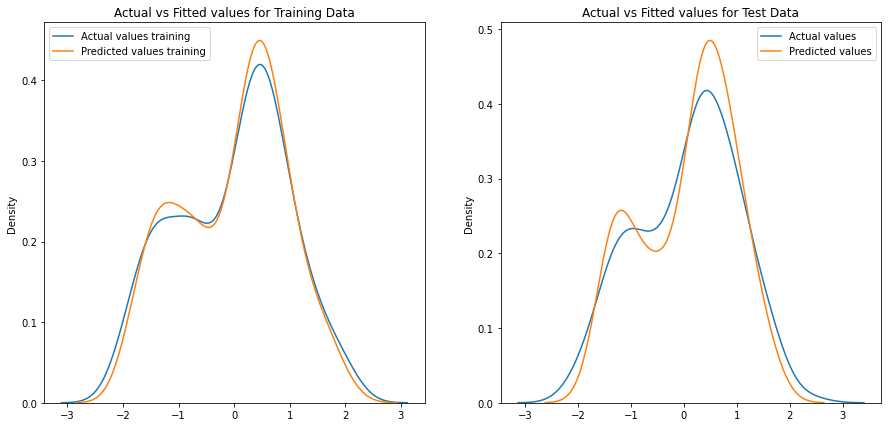

In [192]:
# Setting the size of the figure  
fig, axs = plt.subplots(ncols=2, figsize=(15, 7))  
  
# Plotting the distribution of the actual values in blue and the predicted values in orange for training data  
sns.distplot(y_train, hist=False, label="Actual values training", ax=axs[0])  
sns.distplot(y_train_pred, hist=False, label="Predicted values training", ax=axs[0])  
axs[0].legend()  
  
# Setting the title of the plot for training data  
axs[0].set_title("Actual vs Fitted values for Training Data")  
  
# Plotting the distribution of the actual values in blue and the predicted values in orange for test data  
sns.distplot(y_test, hist=False, label="Actual values", ax=axs[1])  
sns.distplot(y_test_pred, hist=False, label="Predicted values", ax=axs[1])  
axs[1].legend()  
  
# Setting the title of the plot for test data  
axs[1].set_title("Actual vs Fitted values for Test Data")  
  
# Displaying the plot
plt.show()

In [193]:
model.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [194]:
# Accessing the best estimator from the trained model
model.best_estimator_

RandomForestRegressor(n_estimators=200)

In [195]:
# Accessing the cross-validation results from the trained model  
model.cv_results_

{'mean_fit_time': array([0.09751463, 0.21253185, 0.41588254, 0.61937175, 0.08371811,
        0.17066932, 0.39123001, 0.63006797, 0.10106692, 0.18275933,
        0.32485132, 0.48632836, 0.09372172, 0.16649556, 0.39040012,
        0.58866162, 0.08167806, 0.1937748 , 0.35869246, 0.51326141,
        0.0772326 , 0.15626378, 0.33980012, 0.49830127, 0.09106841,
        0.14905982, 0.31297169, 0.45902543, 0.07335348, 0.14808426,
        0.33065882, 0.50225534, 0.08590469, 0.17126036, 0.30733976,
        0.51182108, 0.07558036, 0.14855871, 0.28780818, 0.43129115,
        0.07485571, 0.15148129, 0.28728719, 0.42958298, 0.06496048,
        0.13145313, 0.27190857, 0.4193644 , 0.06612988, 0.1358871 ,
        0.27946124, 0.42798634, 0.07420177, 0.14529529, 0.28605065,
        0.47811084, 0.07901049, 0.12902875, 0.26698446, 0.41301503,
        0.07697954, 0.14258862, 0.35259643, 0.43111053, 0.07895732,
        0.16025348, 0.31620831, 0.42537208, 0.07139463, 0.14817109,
        0.28962507, 0.42076731,

In [196]:
# Accessing the keys of the cross-validation results dictionary from the trained model  
model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [197]:
# Accessing the mean test scores from the cross-validation results of the trained model  
model.cv_results_['mean_test_score']

array([0.87157776, 0.86345096, 0.87298206, 0.86490121, 0.86751461,
       0.86582837, 0.86188239, 0.86161597, 0.85557947, 0.86335108,
       0.85537905, 0.85488104, 0.85365678, 0.8593312 , 0.86079021,
       0.85752967, 0.85534078, 0.85452441, 0.85849805, 0.85455378,
       0.84514244, 0.84248089, 0.84378177, 0.84519559, 0.8300926 ,
       0.83753634, 0.83400949, 0.83626302, 0.82954001, 0.83423893,
       0.83666387, 0.83965891, 0.83308764, 0.82821637, 0.83184229,
       0.83363167, 0.79206114, 0.79754848, 0.79801854, 0.79830232,
       0.7921913 , 0.79970604, 0.79876832, 0.79854671, 0.7954371 ,
       0.79754213, 0.79916794, 0.79856153, 0.78656544, 0.79519258,
       0.79726972, 0.79572563, 0.79262581, 0.78891029, 0.79549206,
       0.79232352, 0.78154659, 0.79173862, 0.79332613, 0.79685836,
       0.78700626, 0.79021265, 0.78788352, 0.79042132, 0.79540871,
       0.78968099, 0.78586545, 0.78486393, 0.77553726, 0.78683187,
       0.78821614, 0.78919643, 0.8672851 , 0.86693732, 0.86797

In [198]:
# Accessing the feature importances of the best estimator from the trained model  
model.best_estimator_.feature_importances_

array([0.0790043 , 0.02872427, 0.25815404, 0.22434406, 0.01713386,
       0.00699005, 0.00994569, 0.00917178, 0.01228738, 0.01402436,
       0.16372455, 0.02312517, 0.11219057, 0.04117992])

### Neural Network

In [199]:
# Creating our features label and target variable
X = df.iloc[:,0:14]
y = df.iloc[:,-1]
y = y.values.reshape(-1,1)

PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X_transform=PredictorScalerFit.transform(X)
y_transform=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 14)
(426, 1)
(183, 14)
(183, 1)


##### mean_squared_error

The Mean Squared Error, or MSE, loss is the default loss to use for regression
problems.
Mathematically, it is the preferred loss function under the inference framework of
maximum likelihood if the distribution of the target variable is Gaussian. It is the loss
function to be evaluated first and only changed if you have a good reason. 
Mean squared error is calculated as the average of the squared differences between the
predicted and actual values. The result is always positive regardless of the sign of the
predicted and actual values and a perfect value is 0.0. The squaring means that larger
mistakes result in more error than smaller mistakes, meaning that the model is punished
for making larger mistakes.

R², on the other hand, measures the proportion of variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating better performance. R² represents the proportion of variance in the target variable that can be predicted by the independent variables in the model. An R² of 1 means that the model perfectly predicts the target variable based on the independent variables, while an R² of 0 means that the model is no better than predicting the mean of the target variable. 

In general, MSE is a more direct measure of the model's accuracy, while R² is a measure of the model's explanatory power. However, both metrics are useful in evaluating a regression model and should be used together to get a complete picture of the model's performance.

In [235]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu',
kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

In [236]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, verbose=0)

In [237]:
# Make predictions on your training and test data  
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

6/6 [==============================] - 0s 2ms/step
R2 Training score: 0.755
R2 Testing score: 0.743

MSE Training score: 0.255
MSE Testing score: 0.233


Text(0, 0.5, 'Loss')

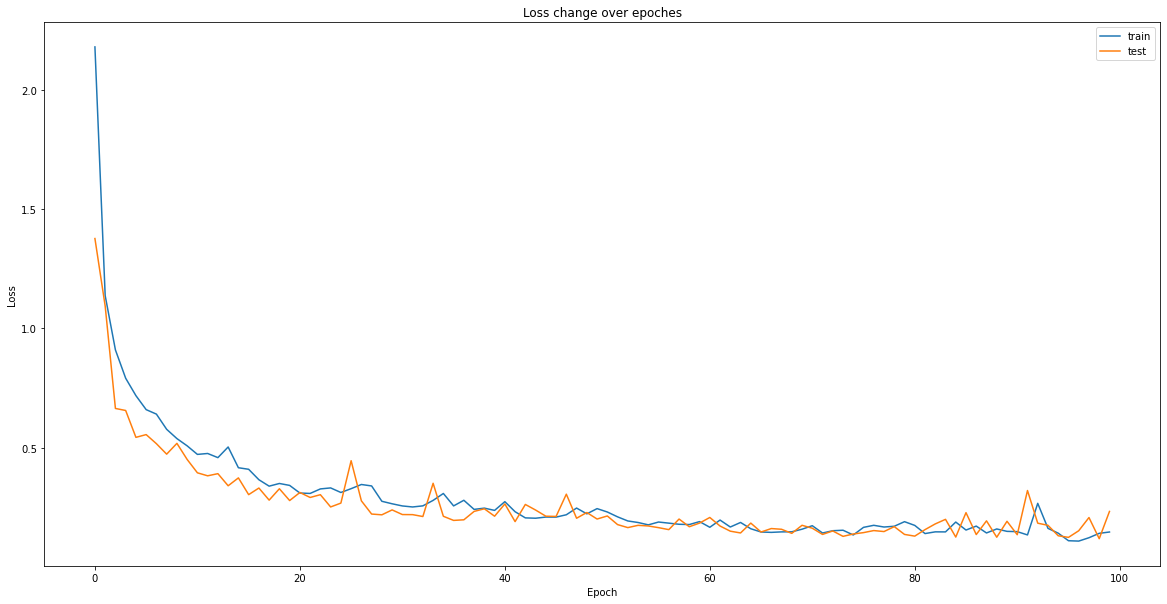

In [238]:
# plot loss during training
plt.figure(figsize=(20,10))
plt.title('Loss change over epoches')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'MSE')

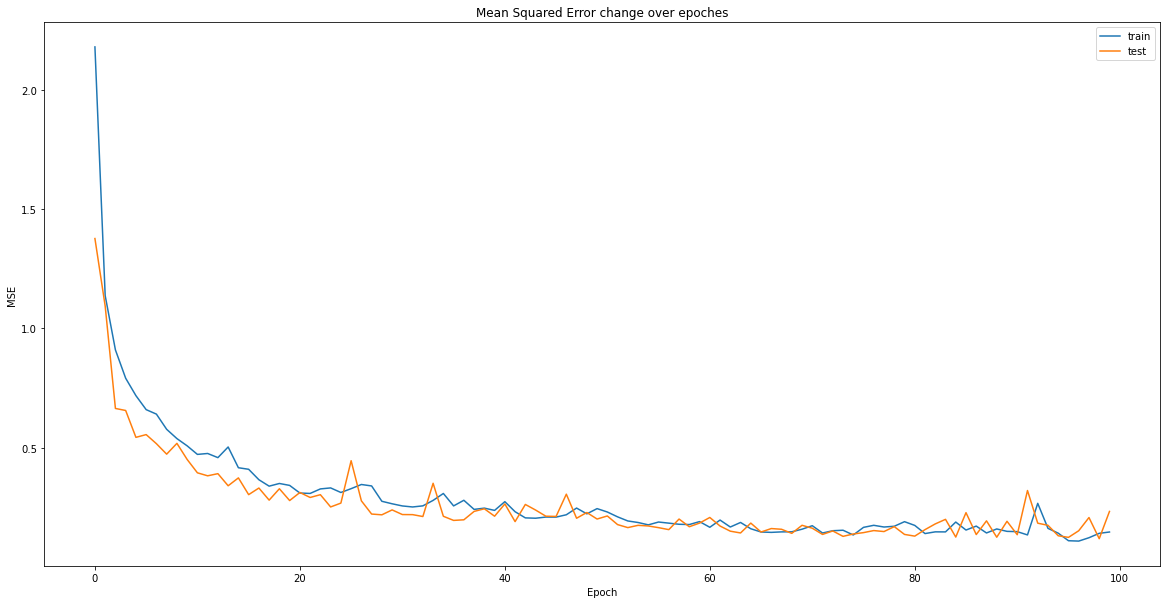

In [239]:
# plot mse during training
plt.figure(figsize=(20,10))
plt.title('Mean Squared Error change over epoches')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")

##### mean_squared_logarithmic_error_loss

There may be regression problems in which the target value has a spread of values and
when predicting a large value, you may not want to punish a model as heavily as mean
squared error.
Instead, you can first calculate the natural logarithm of each of the predicted values,
then calculate the mean squared error. This is called the Mean Squared Logarithmic
Error loss, or MSLE for short.

In [240]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu',
kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

In [241]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [242]:
# Make predictions on your training and test data  
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

6/6 [==============================] - 0s 2ms/step
R2 Training score: 0.209
R2 Testing score: 0.358

MSE Training score: 0.821
MSE Testing score: 0.581


Text(0, 0.5, 'Loss')

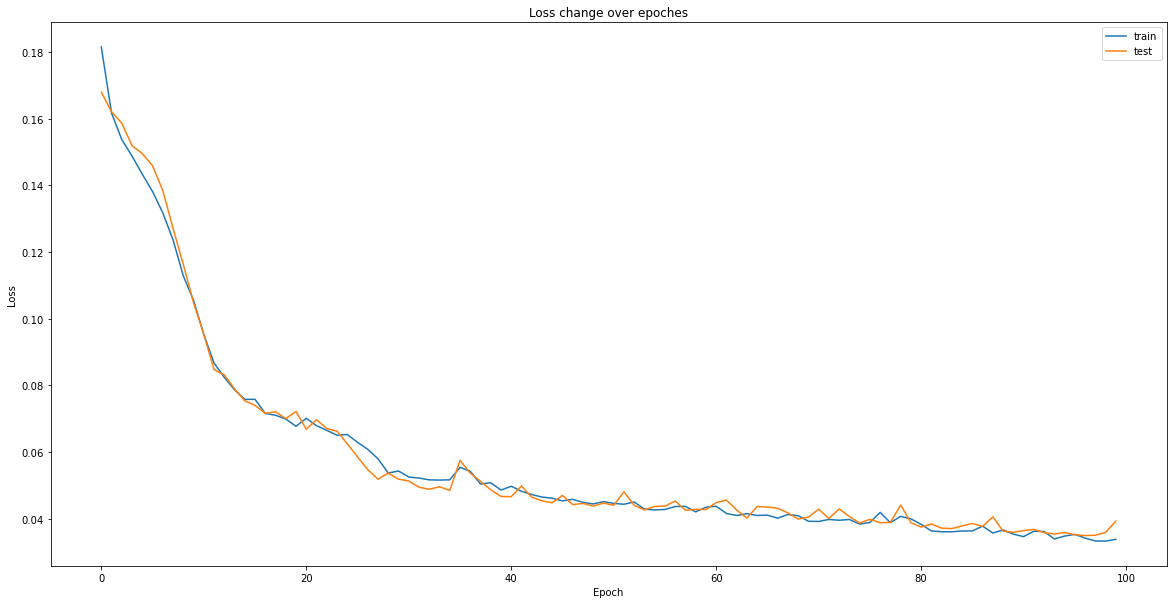

In [243]:
# plot loss during training
plt.figure(figsize=(20,10))
plt.title('Loss change over epoches')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'MSE')

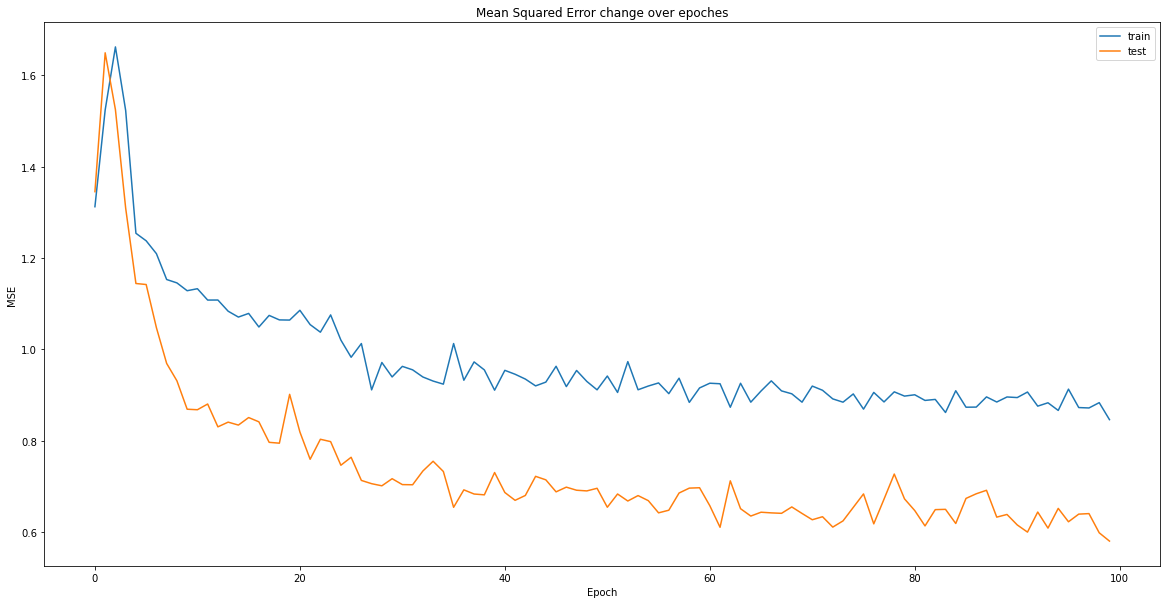

In [244]:
# plot mse during training
plt.figure(figsize=(20,10))
plt.title('Mean Squared Error change over epoches')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")

##### Mean Absolute Error Loss

On some regression problems, the distribution of the target variable may be mostly
Gaussian, but may have outliers, e.g. large or small values far from the mean value.
The Mean Absolute Error, or MAE, loss is an appropriate loss function in this case as it
is more robust to outliers. It is calculated as the average of the absolute difference
between the actual and predicted values. 

In [245]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu',
kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

In [246]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [247]:
# Make predictions on your training and test data  
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

6/6 [==============================] - 0s 1ms/step
R2 Training score: 0.846
R2 Testing score: 0.815

MSE Training score: 0.159
MSE Testing score: 0.168


Text(0, 0.5, 'Loss')

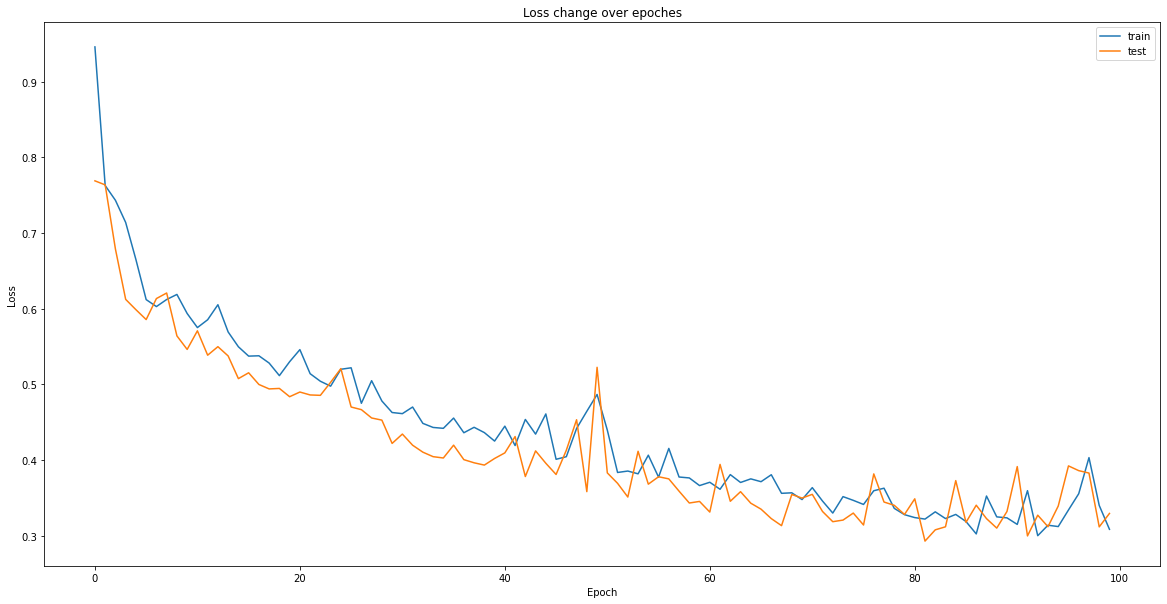

In [248]:
# plot loss during training
plt.figure(figsize=(20,10))
plt.title('Loss change over epoches')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'MSE')

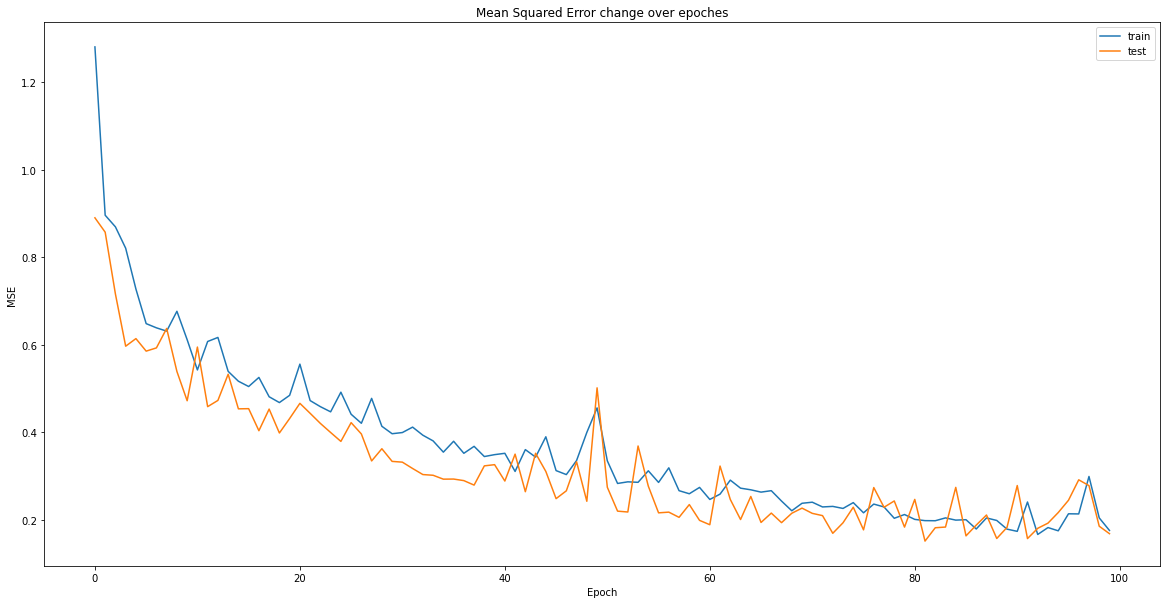

In [249]:
# plot mse during training
plt.figure(figsize=(20,10))
plt.title('Mean Squared Error change over epoches')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")

Given that the best R² result was given by the Mean Squared Error loss function, we will keep using it.

## Tuning

We now rebuild the simplest NN using the MSE loss function and proceed with hyperparameter tuning.

In [23]:
# Creating our features label and target variable
X = df.iloc[:,0:14]
y = df.iloc[:,-1]
y = y.values.reshape(-1,1)

PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X_transform=PredictorScalerFit.transform(X)
y_transform=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 14)
(426, 1)
(183, 14)
(183, 1)


In [24]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1])))
model.add(Dense(1, activation='linear'))

In [25]:
model.compile(loss='mean_squared_error')

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose = 0)

In [26]:
# Make predictions on your training and test data  
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

6/6 [==============================] - 0s 2ms/step
R2 Training score: 0.303
R2 Testing score: 0.284

MSE Training score: 0.724
MSE Testing score: 0.648


Text(0, 0.5, 'Loss')

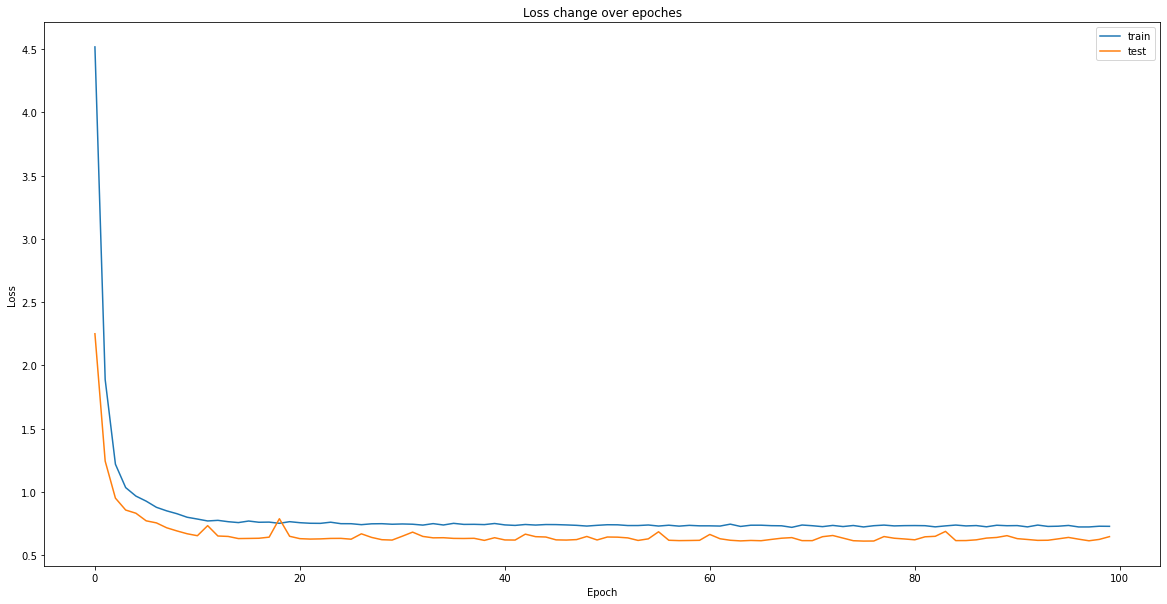

In [27]:
# plot loss during training
plt.figure(figsize=(20,10))
plt.title('Loss change over epoches')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

### GridSearchCV model

In [28]:
# activation options
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

In [29]:
# epochs options
epochs = [10, 50, 100, 500]

In [30]:
# optimizer options
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

In [31]:
# learning rate options
learn_rate = [0.001, 0.01, 0.1, 0.3]

In [32]:
# neurons options
neurons = [1, 5, 10, 20, 30, 50, 80, 100, 150, 200]

In [33]:
# initial mode options
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

#### Activation tuning

In [34]:
# hyperparameter dictionary
result_activation = {
    'softmax': 0,
    'softplus': 0, 
    'softsign': 0, 
    'relu': 0,
    'tanh': 0, 
    'sigmoid': 0, 
    'hard_sigmoid': 0, 
    'linear': 0
}

# parameters grid
param_grid = dict(
    model__activation = activation,
)

In [35]:
# Function to create model, required for KerasClassifier
def create_model(activation):
    # create model
    model = Sequential()
    model.add(Dense(25, input_dim=(X_train.shape[1]), activation=activation))
    model.add(Dense(1, activation='linear'))
 
    # Compile model
    model.compile(loss='mean_squared_error')
    return model

for i in range(5):
    # create model
    model = KerasRegressor(model=create_model, epochs=100, verbose=0)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    result_activation[grid_result.best_params_["model__activation"]] += 1
    print("Cicle %i - Best: %f using %s" % (i+1, grid_result.best_score_, grid_result.best_params_))
    
result_activation

Cicle 1 - Best: 0.535900 using {'model__activation': 'relu'}
Cicle 2 - Best: 0.553857 using {'model__activation': 'relu'}
Cicle 3 - Best: 0.552393 using {'model__activation': 'relu'}
Cicle 4 - Best: 0.516892 using {'model__activation': 'tanh'}
Cicle 5 - Best: 0.546172 using {'model__activation': 'relu'}


{'softmax': 0,
 'softplus': 0,
 'softsign': 0,
 'relu': 4,
 'tanh': 1,
 'sigmoid': 0,
 'hard_sigmoid': 0,
 'linear': 0}

In [63]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error')

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.395, Test: 0.345
14/14 [==============================] - 0s 4ms/step
R² Train: 0.619855079538148
6/6 [==============================] - 0s 3ms/step
R² Test: 0.6185743537466941


### init_mode tuning

In [64]:
# hyperparameter dictionary
result_init_mode = {
    'uniform': 0, 
    'lecun_uniform': 0, 
    'normal': 0, 
    'zero': 0, 
    'glorot_normal': 0, 
    'glorot_uniform': 0, 
    'he_normal': 0, 
    'he_uniform': 0
}

# parameters grid
param_grid = dict(
    model__init_mode = init_mode,
)

In [65]:
# Function to create model, required for KerasClassifier
def create_model(init_mode):
    # create model
    model = Sequential()
    model.add(Dense(25, input_dim=(X_train.shape[1]), activation="relu", kernel_initializer=init_mode))
    model.add(Dense(1, activation='linear'))
 
    # Compile model
    model.compile(loss='mean_squared_error')
    return model

for i in range(5):
    # create model
    model = KerasRegressor(model=create_model, epochs=100, verbose=0)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    result_init_mode[grid_result.best_params_["model__init_mode"]] += 1
    print("Cicle %i - Best: %f using %s" % (i+1, grid_result.best_score_, grid_result.best_params_))
    
result_init_mode

Cicle 1 - Best: 0.578707 using {'model__init_mode': 'normal'}
Cicle 2 - Best: 0.591490 using {'model__init_mode': 'uniform'}
Cicle 3 - Best: 0.586563 using {'model__init_mode': 'normal'}
Cicle 4 - Best: 0.578434 using {'model__init_mode': 'normal'}
Cicle 5 - Best: 0.588485 using {'model__init_mode': 'normal'}


{'uniform': 1,
 'lecun_uniform': 0,
 'normal': 4,
 'zero': 0,
 'glorot_normal': 0,
 'glorot_uniform': 0,
 'he_normal': 0,
 'he_uniform': 0}

In [66]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error')

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.373, Test: 0.313
14/14 [==============================] - 0s 4ms/step
R² Train: 0.6409473673793071
6/6 [==============================] - 0s 4ms/step
R² Test: 0.6546112620105438


### optimizer tuning

In [67]:
# hyperparameter dictionary
result_optimizer = {
    'SGD': 0, 
    'RMSprop': 0, 
    'Adagrad': 0, 
    'Adadelta': 0, 
    'Adam': 0, 
    'Adamax': 0, 
    'Nadam': 0
}

# parameter grid
param_grid = dict(
    optimizer = optimizer
)

In [68]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='normal'))
    model.add(Dense(1, activation='linear'))
 
    # Compile model
    model.compile(loss='mean_squared_error')
    return model


for i in range(5):
    # create model
    model = KerasRegressor(model=create_model, epochs=100, verbose=0)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    result_optimizer[grid_result.best_params_["optimizer"]] += 1
    print("Cicle %i - Best: %f using %s" % (i+1, grid_result.best_score_, grid_result.best_params_))
    
    
result_optimizer

Cicle 1 - Best: 0.590133 using {'optimizer': 'Adamax'}
Cicle 2 - Best: 0.599276 using {'optimizer': 'Adam'}
Cicle 3 - Best: 0.593587 using {'optimizer': 'Adadelta'}
Cicle 4 - Best: 0.585592 using {'optimizer': 'Nadam'}
Cicle 5 - Best: 0.599490 using {'optimizer': 'Adagrad'}


{'SGD': 0,
 'RMSprop': 0,
 'Adagrad': 1,
 'Adadelta': 1,
 'Adam': 1,
 'Adamax': 1,
 'Nadam': 1}

In [71]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='Adagrad')

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.832, Test: 0.743
14/14 [==============================] - 0s 4ms/step
R² Train: 0.19892896744003452
6/6 [==============================] - 0s 3ms/step
R² Test: 0.17947474820660914


### learn_rate tuning

In [73]:
# hyperparameter dictionary
result_learn_rate = {
    '0.001': 0, 
    '0.01': 0, 
    '0.1': 0, 
    '0.3': 0
}

# parameters grid
param_grid = dict(
    optimizer__learning_rate = learn_rate
)

In [74]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
    model.add(Dense(1, activation='linear'))
 
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='Adagrad')
    return model

for i in range(5):
    # create model
    model = KerasRegressor(model=create_model, epochs=100, verbose=0)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    result_learn_rate[str(grid_result.best_params_["optimizer__learning_rate"])] += 1
    print("Cicle %i - Best: %f using %s" % (i+1, grid_result.best_score_, grid_result.best_params_))
    
result_learn_rate

Cicle 1 - Best: 0.134663 using {'optimizer__learning_rate': 0.1}
Cicle 2 - Best: 0.125718 using {'optimizer__learning_rate': 0.3}
Cicle 3 - Best: 0.146484 using {'optimizer__learning_rate': 0.001}
Cicle 4 - Best: 0.132299 using {'optimizer__learning_rate': 0.3}
Cicle 5 - Best: 0.150185 using {'optimizer__learning_rate': 0.3}


{'0.001': 1, '0.01': 0, '0.1': 1, '0.3': 3}

In [75]:
# define optimizer
opt = tf.keras.optimizers.Adagrad(learning_rate=0.3)

# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.246, Test: 0.253
14/14 [==============================] - 0s 3ms/step
R² Train: 0.7630341866199256
6/6 [==============================] - 0s 4ms/step
R² Test: 0.7203768865372027


### neurons tuning

In [76]:
# hyperparameter dictionary
result_neurons = {
    '1': 0, 
    '5': 0, 
    '10': 0, 
    '20': 0, 
    '30': 0, 
    '50': 0, 
    '80': 0, 
    '100': 0, 
    '150': 0, 
    '200': 0
}

# parameter grid
param_grid = dict(
    model__neurons = neurons
)

In [78]:
# Function to create model, required for KerasClassifier
def create_model(neurons):
    
    # define optimizer
    opt = tf.keras.optimizers.Adagrad(learning_rate=0.3)
    
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
    model.add(Dense(1, activation='linear'))
 
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

for i in range(5):
    # create model
    model = KerasRegressor(model=create_model, epochs=100, verbose=0)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    result_neurons[str(grid_result.best_params_["model__neurons"])] += 1
    print("Cicle %i - Best: %f using %s" % (i+1, grid_result.best_score_, grid_result.best_params_))
    
result_neurons

Cicle 1 - Best: 0.738445 using {'model__neurons': 100}
Cicle 2 - Best: 0.751710 using {'model__neurons': 50}
Cicle 3 - Best: 0.747365 using {'model__neurons': 50}
Cicle 4 - Best: 0.735596 using {'model__neurons': 80}
Cicle 5 - Best: 0.757743 using {'model__neurons': 30}


{'1': 0,
 '5': 0,
 '10': 0,
 '20': 0,
 '30': 1,
 '50': 2,
 '80': 1,
 '100': 1,
 '150': 0,
 '200': 0}

In [79]:
# define optimizer
opt = tf.keras.optimizers.Adagrad(learning_rate=0.3)

# define model
model = Sequential()
model.add(Dense(50, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.207, Test: 0.179
14/14 [==============================] - 0s 4ms/step
R² Train: 0.8005979291829035
6/6 [==============================] - 0s 4ms/step
R² Test: 0.8023795531143195


### epochs tuning

In [80]:
# hyperparameter dictionary
result_epochs = {
    '10': 0, 
    '50': 0, 
    '100': 0, 
    '500': 0
}

# parameters grid
param_grid = dict(
    epochs = epochs
)

In [82]:
# Function to create model, required for KerasClassifier
def create_model():
    # define optimizer
    opt = tf.keras.optimizers.Adagrad(learning_rate=0.3)
    
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
    model.add(Dense(1, activation='linear'))
 
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

for i in range(5):
    # create model
    model = KerasRegressor(model=create_model, verbose=0)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    result_epochs[str(grid_result.best_params_["epochs"])] += 1
    print("Cicle %i - Best: %f using %s" % (i+1, grid_result.best_score_, grid_result.best_params_))

result_epochs

Cicle 1 - Best: 0.872111 using {'epochs': 500}
Cicle 2 - Best: 0.862913 using {'epochs': 500}
Cicle 3 - Best: 0.876002 using {'epochs': 500}
Cicle 4 - Best: 0.853690 using {'epochs': 500}
Cicle 5 - Best: 0.872033 using {'epochs': 500}


{'10': 0, '50': 0, '100': 0, '500': 5}

In [46]:
# define optimizer
opt = tf.keras.optimizers.Adagrad(learning_rate=0.3)

# define model
model = Sequential()
model.add(Dense(50, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.043, Test: 0.069
14/14 [==============================] - 0s 2ms/step
R² Train: 0.958117324119806
6/6 [==============================] - 0s 3ms/step
R² Test: 0.923669032570541


Text(0, 0.5, 'Loss')

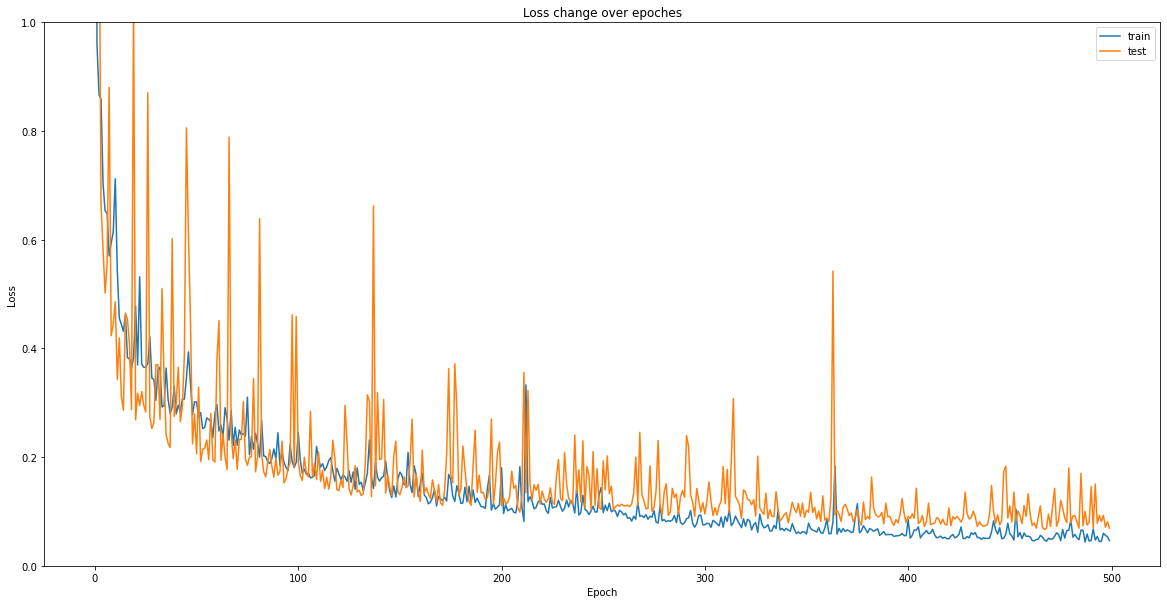

In [47]:
# plot loss during training
plt.figure(figsize=(20,10))
plt.title('Loss change over epoches')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [41]:
# define optimizer
opt = tf.keras.optimizers.Adagrad(learning_rate=0.3)

# define model
model = Sequential()
model.add(Dense(50, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose = 0)

In [42]:
# Make predictions on your training and test data  
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

6/6 [==============================] - 0s 2ms/step
R2 Training score: 0.962
R2 Testing score: 0.922

MSE Training score: 0.039
MSE Testing score: 0.071


## RandomizedSearchCV

In [39]:
# parameters grid
param_grid = dict(
    model__init_mode = init_mode,
    model__activation = activation,
    model__neurons = neurons,
    batch_size = batch_size, 
    epochs = epochs,
    optimizer = optimizer,
    optimizer__learning_rate = learn_rate,
)

In [41]:
# Function to create model, required for KerasClassifier
def create_model(neurons, activation, init_mode):
    # create model
    model = Sequential()
    model.add(Dense(25, input_dim=(X_train.shape[1]), activation=activation, kernel_initializer=init_mode))
    model.add(Dense(6, activation='linear', kernel_initializer=init_mode))

    # Compile model
    model.compile(loss='mean_squared_error')
    return model

# create model
model = KerasRegressor(model=create_model)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\Simone\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Epoch 1/500
6/6 [==============================] - 1s 5ms/step - loss: 1.0356
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0282
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0194
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0100
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0012
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.9918
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 0.9825
Epoch 8/500
6/6 [==============================] - 0s 5ms/step - loss: 0.9712
Epoch 9/500
6/6 [==============================] - 0s 5ms/step - loss: 0.9590
Epoch 10/500
6/6 [==============================] - 0s 5ms/step - loss: 0.9460
Epoch 11/500
6/6 [==============================] - 0s 5ms/step - loss: 0.9341
Epoch 12/500
6/6 [==============================] - 0s 4ms/step - loss: 0.9215
Epoch 13/500
6/6 [==============================] - 0s 5ms/st

6/6 [==============================] - 0s 4ms/step - loss: 0.4471
Epoch 207/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4434
Epoch 208/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4445
Epoch 209/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4461
Epoch 210/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4444
Epoch 211/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4422
Epoch 212/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4404
Epoch 213/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4383
Epoch 214/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4348
Epoch 215/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4351
Epoch 216/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4380
Epoch 217/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4356
Epoch 218/500
6/6 [==============================] - 0

6/6 [==============================] - 0s 4ms/step - loss: 0.3251
Epoch 411/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3307
Epoch 412/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3290
Epoch 413/500
6/6 [==============================] - 0s 6ms/step - loss: 0.3222
Epoch 414/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3275
Epoch 415/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3245
Epoch 416/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3305
Epoch 417/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3257
Epoch 418/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3223
Epoch 419/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3271
Epoch 420/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3215
Epoch 421/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3202
Epoch 422/500
6/6 [==============================] - 0

In [42]:
# define optimizer
opt = tf.keras.optimizers.SGD(learning_rate=0.3)

# define model
model = Sequential()
model.add(Dense(5, input_dim=(X_train.shape[1]), activation='tanh', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='Adam')

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size = 80, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.350, Test: 0.304
14/14 [==============================] - 0s 4ms/step
R² Train: 0.6633378231576783
6/6 [==============================] - 0s 4ms/step
R² Test: 0.6640810714439132
